#### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Exploratory Data Analysis

In [3]:
data = pd.read_json("data.json")
print(data.shape)
data.head()

(209527, 2)


,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209527 entries, 0 to 209526
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  209527 non-null  object
 1   category  209527 non-null  object
dtypes: object(2)
memory usage: 4.8+ MB


In [5]:
data["category"].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

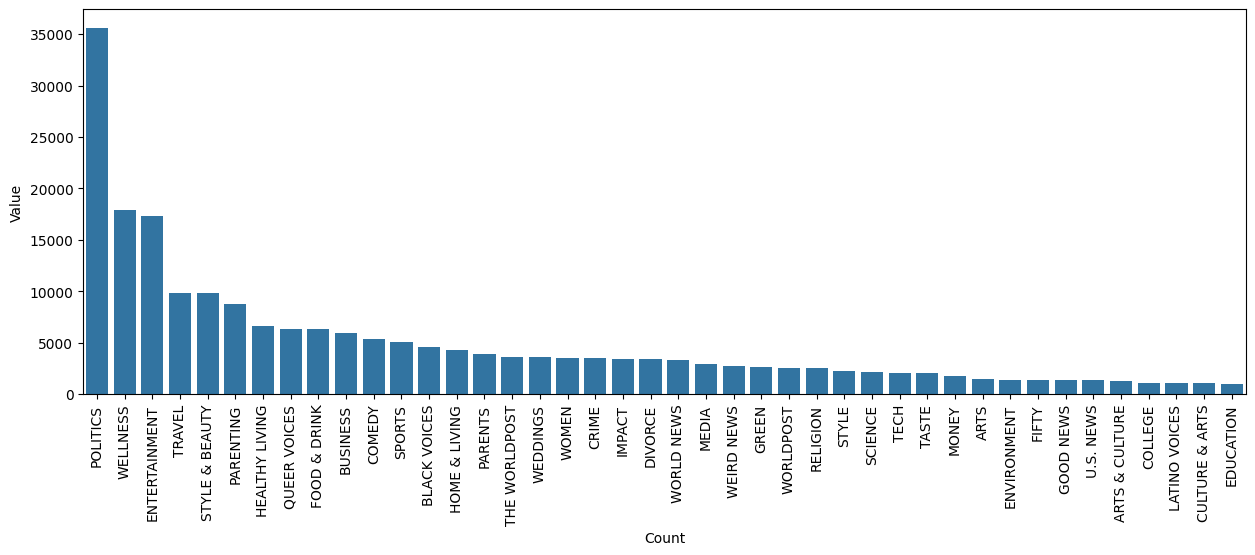

In [6]:
top_values = data['category'].value_counts()

plt.figure(figsize = (15, 5))
sns.barplot(y = top_values.values, x = top_values.index, orient = "x")
plt.xticks(rotation = 90)
plt.xlabel("Count")
plt.ylabel("Value")
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

X = TfidfVectorizer().fit_transform(data['headline'])
y = data['category']

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

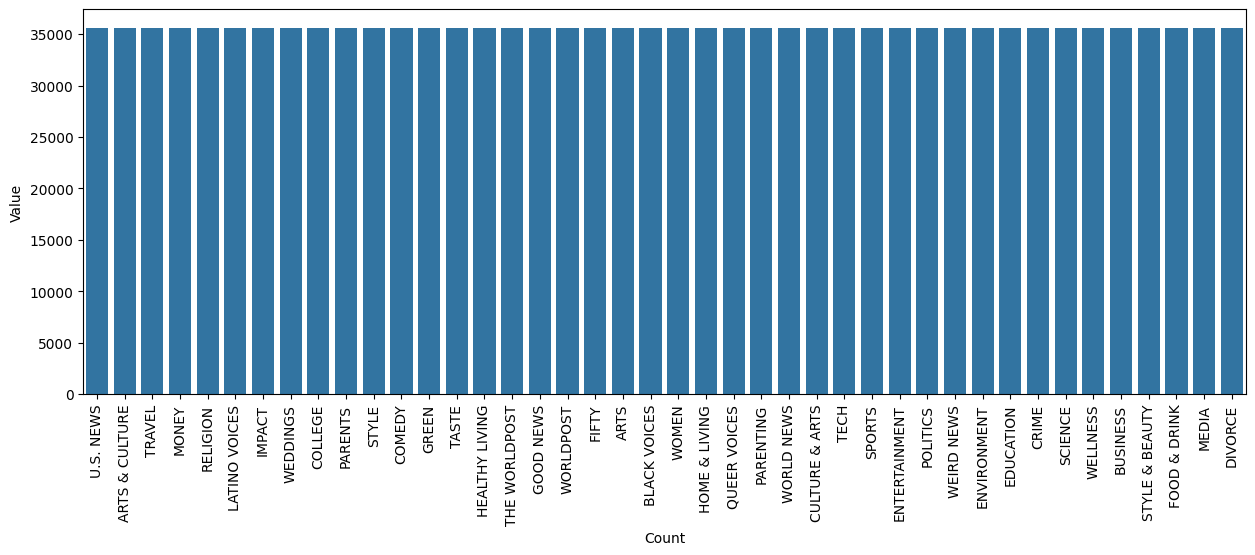

In [8]:
top_values = y_resampled.value_counts()

plt.figure(figsize = (15, 5))
sns.barplot(y = top_values.values, x = top_values.index, orient = "x")
plt.xticks(rotation = 90)
plt.xlabel("Count")
plt.ylabel("Value")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced')

model.fit(X = X_resampled, y = y_resampled)

KeyboardInterrupt: 